![image.png](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

# Análise Exploratória e Preditiva + Deploy Web:

# Titanic - Quem sobreviveria?

***

Análise realizada por ***Vinícius Nunes Rebeque*** em Setembro/2022

Visite meu LinkedIn: https://www.linkedin.com/in/vrebeque/

Explore meu GitHub: https://www.github.com/Rebeque

Fonte dos dados: https://www.kaggle.com/competitions/titanic/data
* * *

**1. INTRODUÇÃO:**

Esse dataset compreende os **dados históricos** do terrível acidente do "inafundável" RMS Titanic que ironicamente **afundou em 1912**. Infelizmente não haviam botes salva vidas suficientes para todos dentro do navio, o que resultou na **morte de 1502 dos 2224** totais entre passageiros e tripulação.

Enquanto houveram **elementos de sorte** que determinaram quem sobreviveu ou não ao acidente, **aparentemente** alguns grupos de pessoas tiveram **maiores chances de sobreviver**. Será que existe **alguma relação ou forma de predizer** quem sobreviveria e quais seriam os fatores determinantes para esse feito?

***Vamos analisar!***
***

**2. OBJETIVOS:**
* Praticar conceitos de manipulação de dados;
* Explorar os dados históricos do acidente;
* Verificar se existe relação entre a sobrevivência ou não dos passageiros com base no que sabemos;
* Criar um algoritmo de predição capaz de determinar a sobrevivência ou não de um indivíduo com base em atributos;
* Desenvolver uma página web para o usuário final entrar com seus dados e descobrir se ele sobreviveria ou não (verifique meu GitHub).

**Um breve comentário:** a idéia desse trabalho é **sedimentar os conhecimentos** que venho estudando em várias frentes e ainda por cima **testar minhas habilidades** em um ramo de conhecimento **que não é o meu principal** - HTML e CSS.

Acredito que **todo conhecimento é útil** e quanto mais eu conseguir **"linkar" conhecimentos** diferentes mais soluções de mercado eu posso apresentar para meus clientes. Acredito que **trabalhar com tecnologia** não permite uma zona de conforto onde eu me especialize **apenas em um ponto**. A **contextualização dos conteúdos** é de vital importância para um bom profissional.

***

**3. EXTRAÇÃO DOS DADOS:**

In [1]:
# Importação e alias das bibliotecas Python necessárias

import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
import zipfile

A Kaggle disponibilizou esse dataset em divisão de treino e teste porque ele foi criado justamente para fins acadêmicos de aprendizado de máquina.

In [2]:
# Carrega o Dataset utilizando o pacote Pandas no alias 'df'
df_treino = pd.read_csv('data/train.csv')
df_teste = pd.read_csv('data/test.csv')

**4. EXPLORAÇÃO:**

Verificando os dados sobre o dataset

In [3]:
print(df_treino.shape)
print('\n')
print(df_teste.shape)
print('\n')
print(df_treino.columns)
print('\n')
print(df_teste.columns)

(891, 12)


(418, 11)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


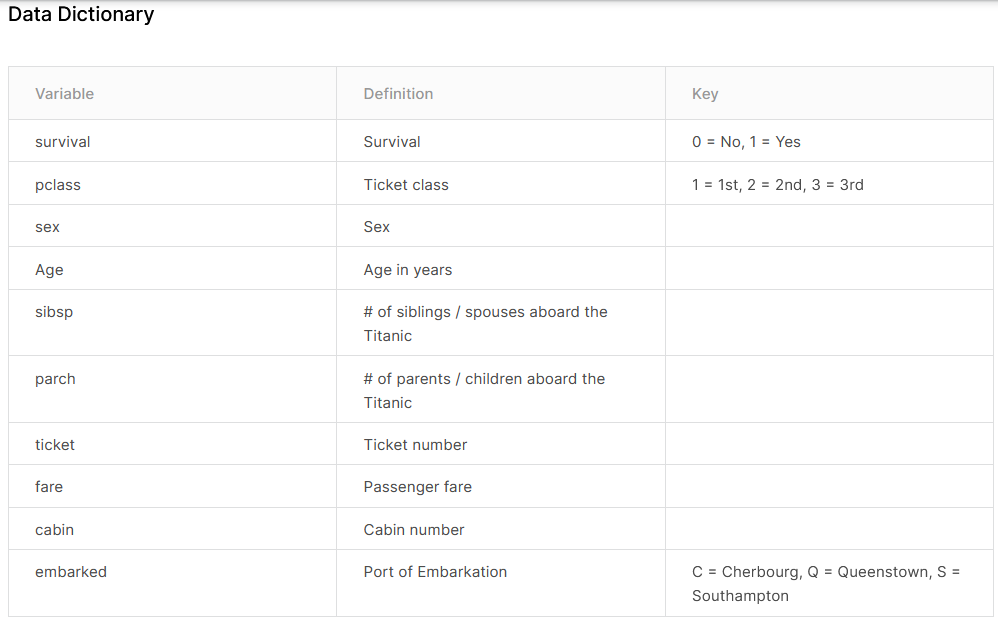

Temos 891 registros para treino e 418 para teste. Organizados em 11 features e 1 target.

In [4]:
# Primeiras linhas
df_treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Últimas linhas
df_treino.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Descrição estatística
df_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***
Analisando o sumário:
* Boa parte das colunas são qualitativas mas foram registradas como valores numéricos. São elas: PassengerId, Survived, Pclass. Verificarei a possibilidade e implicações em alterar essas features para seu tipo correspondente por meio da alteração numérica para string.
* A média de Pclass indica que a população média era composta em sua maioria de pessoas da segunda e terceira classe, no entanto, existia uma população considerável na primeira classe.
* A idade média da população era de 29.7 anos com variações médias consideráveis de 14.5 anos entre os indivíduos.
* Apenas um quartio dos passageiros embarcou com irmãos ou esposa, na média a cada 0.52 indivíduo um embarcou com esse tipo de acompanhante.
* O valor foi ainda menor para embarque com pais ou crianças. Em média para cada 0.38 indivíduo um embarcou com seus pais ou com uma criança.
* O preço médio da passagem paga foi de 32.2 USD, com grande variação média de 49.69 USD, provavelmente relacionados a diferença de classes. A divisão nos quartios nos mostra claramente essa diferenciação de preço entre as classes. O valor mais alto pago em uma passagem foi de 512.33 USD.

In [7]:
# Verificando informações sobre as features
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Irei trocar alguns desses tipos de dados no momento da manipulação.

In [8]:
# Verificando valores ausentes
df_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Não temos 177 registros de idade, 687 registros de número da cabine (a maioria) e 2 registros de local de embarque. Vou decidir o que fazer com esses valores ausentes mais tarde.

**5. MANIPULAÇÃO DOS DADOS**

Vou começar traduzindo o nome das features e depois alterando seus tipos para coincidir com suas informações.

In [9]:
# Lista de colunas como está
df_treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Lista de alterações nas colunas com nomes mais descritivos e em português
df_treino.rename(columns = {'PassengerId':'ID_Passageiro', 
                            'Survived':'Sobreviveu', 
                            'Pclass':'Classe_Passageiro', 
                            'Name':'Nome',
                            'Sex':'Gênero',
                            'Age':'Idade',
                            'SibSp':'N_Esposa_Irmãos',
                            'Parch':'N_Pais_Filhos',
                            'Ticket':'Num_Passagem',
                            'Fare':'Valor_Passagem',
                            'Cabin':'Num_Cabine',
                            'Embarked':'Local_Embarque'}, inplace = True)

# Nova lista de colunas
df_treino.columns

Index(['ID_Passageiro', 'Sobreviveu', 'Classe_Passageiro', 'Nome', 'Gênero',
       'Idade', 'N_Esposa_Irmãos', 'N_Pais_Filhos', 'Num_Passagem',
       'Valor_Passagem', 'Num_Cabine', 'Local_Embarque'],
      dtype='object')

Vou transcrever o mesmo código para evitar problemas com o dataset de teste, já que ele já veio dividido preciso aplicar tudo aos dois.

In [11]:
# Reprodução no dataset de validação
df_teste.rename(columns = {'PassengerId':'ID_Passageiro', 
                            'Pclass':'Classe_Passageiro', 
                            'Name':'Nome',
                            'Sex':'Gênero',
                            'Age':'Idade',
                            'SibSp':'N_Esposa_Irmãos',
                            'Parch':'N_Pais_Filhos',
                            'Ticket':'Num_Passagem',
                            'Fare':'Valor_Passagem',
                            'Cabin':'Num_Cabine',
                            'Embarked':'Local_Embarque'}, inplace = True)

df_teste.set_index('ID_Passageiro', inplace = True)

df_teste = df_teste.astype({'Classe_Passageiro':str})

In [12]:
# Verificando
df_treino.head(1)

,ID_Passageiro,Sobreviveu,Classe_Passageiro,Nome,Gênero,Idade,N_Esposa_Irmãos,N_Pais_Filhos,Num_Passagem,Valor_Passagem,Num_Cabine,Local_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Vou alterar o ID do passageiro para ser nosso novo índice, já que não faz sentido termos dois índices com valores únicos que representam a mesma informação.

In [13]:
# ID_Passageiro como índice
df_treino.set_index('ID_Passageiro', inplace = True)

In [14]:
# Verificando
df_treino.head(1)

,Sobreviveu,Classe_Passageiro,Nome,Gênero,Idade,N_Esposa_Irmãos,N_Pais_Filhos,Num_Passagem,Valor_Passagem,Num_Cabine,Local_Embarque
ID_Passageiro,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Alterando os tipos de dados para condizer com o que contém:

In [15]:
# Como estava
df_treino.dtypes

Sobreviveu             int64
Classe_Passageiro      int64
Nome                  object
Gênero                object
Idade                float64
N_Esposa_Irmãos        int64
N_Pais_Filhos          int64
Num_Passagem          object
Valor_Passagem       float64
Num_Cabine            object
Local_Embarque        object
dtype: object

In [16]:
# Alterando
df_treino = df_treino.astype({'Sobreviveu':str, 
                              'Classe_Passageiro':str})

Eu havia tentado trocar as idades dos passageiros para número INTEIRO já que o dataset apresenta essas idades como DECIMAIS, porém, não é possível converter valores ausentes para INT então vou manter como está. Existe uma perda de performance mas nada que vá atrapalhar no trabalho.

In [17]:
# Como ficou
df_treino.dtypes

Sobreviveu            object
Classe_Passageiro     object
Nome                  object
Gênero                object
Idade                float64
N_Esposa_Irmãos        int64
N_Pais_Filhos          int64
Num_Passagem          object
Valor_Passagem       float64
Num_Cabine            object
Local_Embarque        object
dtype: object

Agora nossos valores estatísticos numéricos ficam melhores apresentados

In [18]:
df_treino.describe()

,Idade,N_Esposa_Irmãos,N_Pais_Filhos,Valor_Passagem
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Já que temos boa parte dos valores de idade ausentes, vou preenchê-los com a média dos dados que já temos. Assim nosso modelo de aprendizado de máquina terá dados para trabalhar. Em uma situação real, o ideal seria não ter tantos valores ausentes.

In [19]:
# Quantos valores ausentes temos ANTES
df_treino['Idade'].isna().sum()

177

In [20]:
# Criando um objeto média idade para a coluna
media_idade = df_treino['Idade'].mean()
media_idade_teste = df_teste['Idade'].mean()
print(media_idade)
print(media_idade_teste)

29.69911764705882
30.272590361445783


In [21]:
# Usando a função fillNA para preencher valores usando o objeto de média criado na célula anterior
df_treino['Idade'].fillna(value=media_idade, inplace=True)
df_teste['Idade'].fillna(value=media_idade, inplace=True)
print('Novos valores inseridos. Verificando por valores ausentes novamente: ')
df_treino['Idade'].isna().sum()

Novos valores inseridos. Verificando por valores ausentes novamente: 


0

Acredito que as mudanças mais importantes foram feitas. Caso algo atrapalhe no caminho posso fazer durante o processo.

**6. GERANDO VISUALIZAÇÕES E INSIGHTS**

In [22]:
# Verificando o nome das nossas features novamente
df_treino.columns

Index(['Sobreviveu', 'Classe_Passageiro', 'Nome', 'Gênero', 'Idade',
       'N_Esposa_Irmãos', 'N_Pais_Filhos', 'Num_Passagem', 'Valor_Passagem',
       'Num_Cabine', 'Local_Embarque'],
      dtype='object')

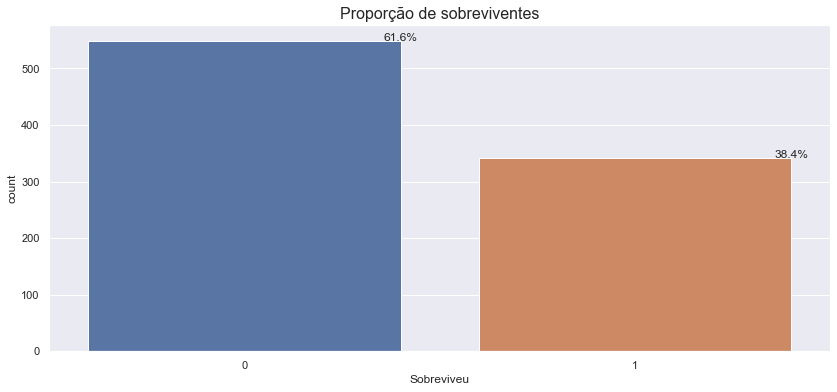

In [23]:
# Qual a proporção de pessoas que sobreviveu em relação a quem faleceu?
total = float(len(df_treino))
ax = sns.countplot(x='Sobreviveu', data=df_treino)
plt.title('Proporção de sobreviventes', fontsize=16)
for p in ax.patches:
    porcentagem = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(porcentagem, (x, y),ha='center')
plt.show()

Nossos dados um pouco desbalanceados, mas refletem a realidade já que são dados reais dos sobreviventes. Mais tarde podemos verificar a necessidade de fazer um balanceamento artificial nos sobreviventes para melhorar a precisão do algoritmo.

C = Cherbourg, Q = Queenstown, S = Southampton


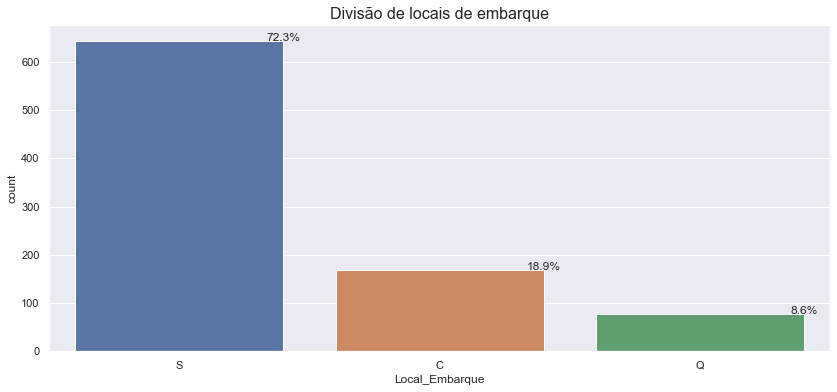

In [24]:
# Distribuição do local de embarque
print('C = Cherbourg, Q = Queenstown, S = Southampton')
total = float(len(df_treino))
ax = sns.countplot(x=df_treino['Local_Embarque'])
plt.title('Divisão de locais de embarque', fontsize=16)
for p in ax.patches:
    porcentagem = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(porcentagem, (x, y),ha='center')
plt.show()

A maioria dos passageiros saiu de Southampton que foi o ponto de partida na Inglaterra, o primeiro ponto.

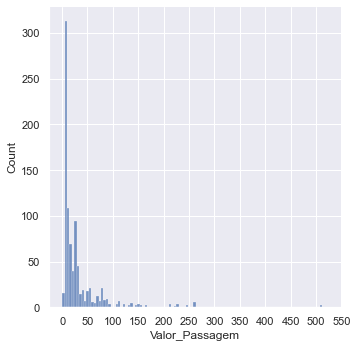

In [25]:
# Distribuição do valor pago pela passagem de cada tripulante
plot = sns.displot(x=df_treino['Valor_Passagem'])
plot.set(xticks=np.arange(0,600,50))

Aparentemente boa parte dos tripulantes pagou uma quantidade mínima no valor da passagem. Acredito que quem não pagou nada sejam funcionários e convidados de honra.

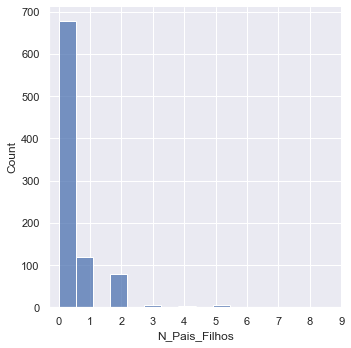

In [26]:
# Distribuição de acompanhantes pais ou filhos
plot = sns.displot(x=df_treino['N_Pais_Filhos'])
plot.set(xticks=np.arange(0,10,1))

A maioria não levou acompanhantes do tipo filhos ou pais.

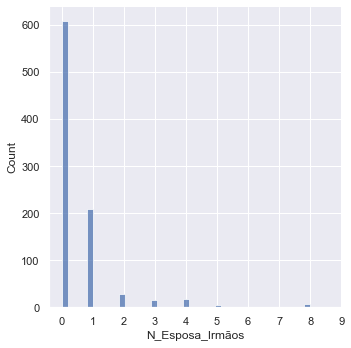

In [27]:
# Distribuição de acompanhantes esposa ou irmãos
plot = sns.displot(x=df_treino['N_Esposa_Irmãos'])
plot.set(xticks=np.arange(0,10,1))

A maioria dos tripulantes não levou esse tipo de acompanhante ou levou apenas 1.

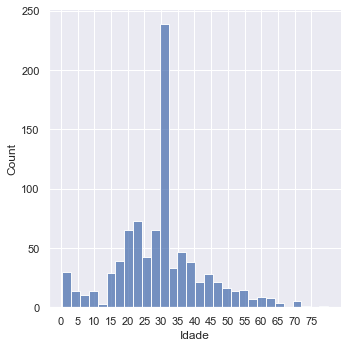

In [28]:
# Distribuição das idades dos tripulantes
plot = sns.displot(x=df_treino['Idade'])
plot.set(xticks=np.arange(0,80,5))

Esse gráfico é tendencioso já que tivemos que implementar muitos valores ausentes usando um valor de média, que foi justamente próximo de 30! 

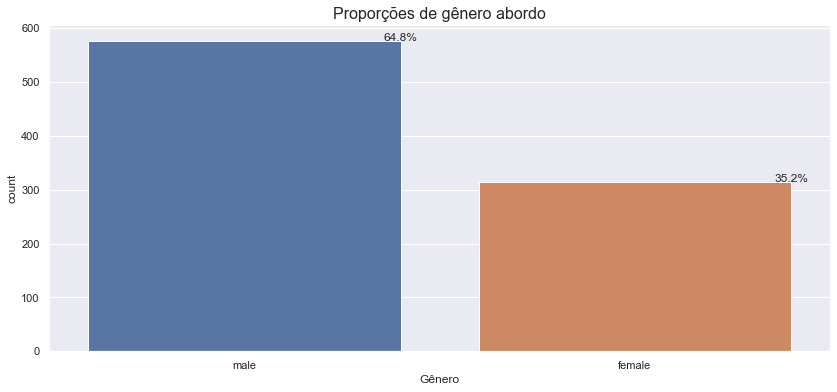

In [29]:
# Distribuição das gêneros
total = float(len(df_treino))
ax = sns.countplot(x=df_treino['Gênero'])
plt.title('Proporções de gênero abordo', fontsize=16)
for p in ax.patches:
    porcentagem = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(porcentagem, (x, y),ha='center')
plt.show()

Quase o dobro de homens no navio.

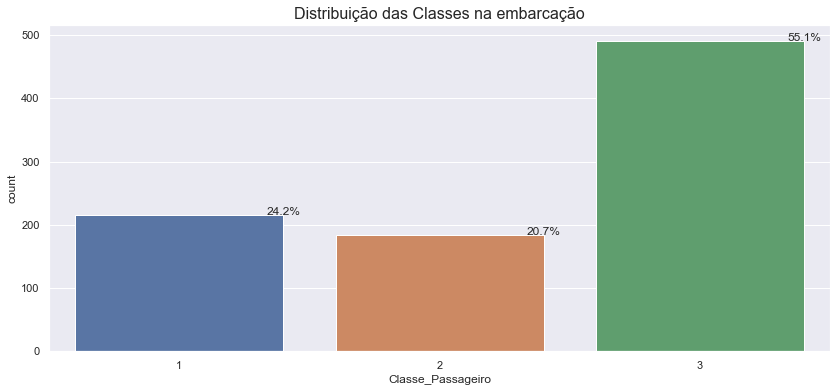

In [30]:
# Distribuição das classes na embarcação
total = float(len(df_treino))
ax = sns.countplot(x=df_treino['Classe_Passageiro'], order=['1','2','3'])
plt.title('Distribuição das Classes na embarcação', fontsize=16)
for p in ax.patches:
    porcentagem = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(porcentagem, (x, y),ha='center')
plt.show()

Maioria majoritária de passageiros na terceira classe. 

Text(0.5, 1.0, 'Checando por outliers nas variáveis numéricas')

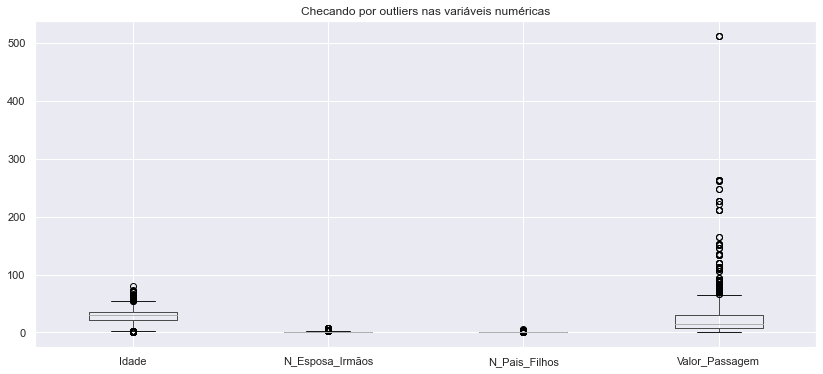

In [31]:
# Verificando outliers para nossas variáveis numéricas
df_treino.boxplot()
plt.title('Checando por outliers nas variáveis numéricas')

Temos um valor extremamente fora da curva no atributo Valor_Passagem. Como eu pretendo usar um algorítmo RandomForest no modelo de aprendizado de máquina creio que esse valor não será um problema.

Vou verificar a relação entre as variáveis usando uma matriz de correlação com o método Pearson para entender melhor a importância de cada uma delas com relação a sobrevivência dos tripulantes.

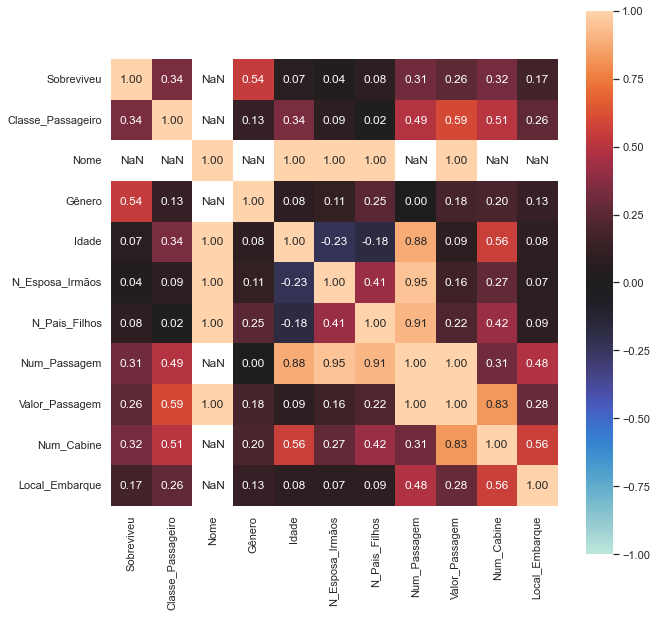

{'corr':                    Sobreviveu  Classe_Passageiro  Nome    Gênero     Idade  \
 Sobreviveu           1.000000           0.336684   0.0  0.540200  0.069809   
 Classe_Passageiro    0.336684           1.000000   0.0  0.129690  0.336183   
 Nome                 0.000000           0.000000   1.0  0.000000  1.000000   
 Gênero               0.540200           0.129690   0.0  1.000000  0.084153   
 Idade                0.069809           0.336183   1.0  0.084153  1.000000   
 N_Esposa_Irmãos      0.035322           0.092652   1.0  0.114631 -0.232625   
 N_Pais_Filhos        0.081629           0.018653   1.0  0.245489 -0.179191   
 Num_Passagem         0.310501           0.486299   0.0  0.000000  0.878488   
 Valor_Passagem       0.257307           0.594217   1.0  0.182333  0.091566   
 Num_Cabine           0.324698           0.505607   0.0  0.198041  0.556126   
 Local_Embarque       0.173099           0.263711   0.0  0.125467  0.081791   
 
                    N_Esposa_Irmãos  N_Pai

In [32]:
# Matriz de correlação usando Dython para variáveis categórias
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
import warnings
warnings.filterwarnings('ignore')

features_categoricas=identify_nominal_columns(df_treino)

associations(df_treino, nominal_columns='auto', 
             numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson', 
             ax=None, 
             figsize=(10,10), annot=True, fmt='.2f', cmap=None, 
             sv_color='silver', cbar=True, vmax=1.0, vmin=None,
             plot=True, compute_only=False, clustering=False, title=None, filename='correlacao.png')

Os valores mais expressivos de correlação na coluna de sobrevivência foram:

Gênero = 0.54

Classe_Passageiro = 0.34

<br>

Num_Passagem = 0.31

Valor_Passagem = 0.26

Num_Cabine = 0.32

Em ordem de importância eu classifico gênero e classe do passageiro já que o número da passagem, valor e número da cabine tem relação direta com a classe em que o passageiro está. 

Vamos plotar essas variáveis agrupadas para visualizarmos sua relação.

Text(0.5, 1.0, 'Proporção de Sobreviventes por Gênero')

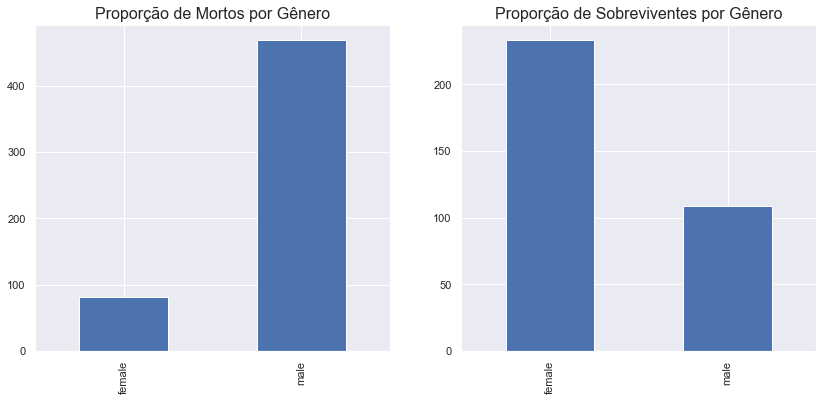

In [33]:
# Disperção de Gênero vs Sobrevivência
data = df_treino.groupby(['Sobreviveu', 'Gênero'])['Gênero'].count() # Agrupando dados
df_genero_dict = data.to_dict() # Transformando série em dicionário
df_genero = pd.DataFrame(data=df_genero_dict, index=[0,1,2,3]) # Transformando dicionário em dataframe com índice
df_genero.drop([3,2,1], inplace=True) # Limpando linhas duplicadas pela conversão
df_genero.rename(columns={'0':'Não Sobreviveu', '1': 'Sobreviveu'}, inplace=True) # Renomeando colunas
 
falecidos = df_genero['Não Sobreviveu'].T # Objeto criado para falecidos
sobreviventes = df_genero['Sobreviveu'].T # Objeto criado para sobreviventes

# Plotando e legenda
fig, axes = plt.subplots(nrows=1, ncols=2)
falecidos.plot(legend=False, kind='bar', ax=axes[0]); axes[0].set_title('Proporção de Mortos por Gênero', fontsize=16)
sobreviventes.plot(legend=False, kind='bar', ax=axes[1]); axes[1].set_title('Proporção de Sobreviventes por Gênero', fontsize=16)

Homens morreram mais, consequentemente mais mulheres sobreviveram.

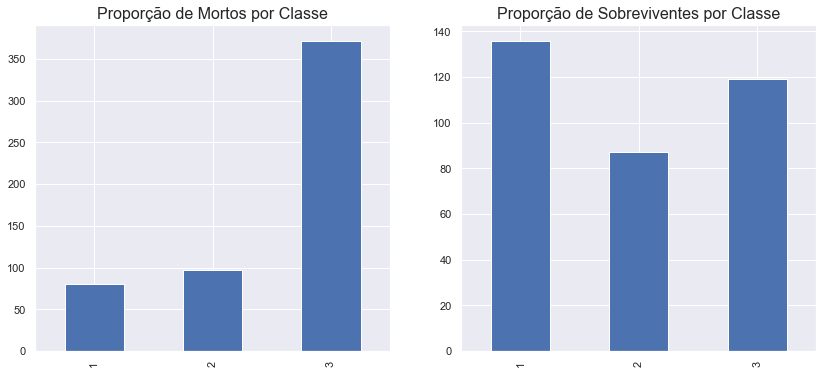

In [34]:
# Mesma lógica da última célula
data_classe = df_treino.groupby(['Sobreviveu', 'Classe_Passageiro'])['Classe_Passageiro'].count()
data_classe_dict = data_classe.to_dict()
df_classe = pd.DataFrame(data=data_classe_dict, index=[0,1,2,3,4,5])
df_classe.drop([5,4,3,2,1], inplace=True)

df_classe.rename(columns={'0':'Não Sobreviveu', '1': 'Sobreviveu'}, inplace=True, level=0)

falecidos_c = df_classe['Não Sobreviveu'].T
sobreviventes_c = df_classe['Sobreviveu'].T

fig, axes = plt.subplots(nrows=1, ncols=2)
falecidos_c.plot(legend=False, kind='bar', ax=axes[0]); axes[0].set_title('Proporção de Mortos por Classe', fontsize=16)
sobreviventes_c.plot(legend=False, kind='bar', ax=axes[1]); axes[1].set_title('Proporção de Sobreviventes por Classe', fontsize=16)
plt.show()

A maioria de mortos se concentrou na terceira classe. Entre os sobreviventes os da primeira classe foram maioria, mas quase a mesma quantia de pessoas se salvou da terceira classe. A vantagem da terceira classe é a quantidade de tripulantes.

In [35]:
# Imprimindo dados agrupados
print('Na terceira classe tínhamos 491 passageiros, uma quantidade maior que o dobro do que na primeira classe.\n')
print(df_treino.groupby(['Classe_Passageiro'])['Nome'].count())
print('\n')
print(df_classe)

Na terceira classe tínhamos 491 passageiros, uma quantidade maior que o dobro do que na primeira classe.

Classe_Passageiro
1    216
2    184
3    491
Name: Nome, dtype: int64


  Não Sobreviveu          Sobreviveu         
               1   2    3          1   2    3
0             80  97  372        136  87  119


In [36]:
# Usando a função LOC do pandas para não digitar os valores manualmente
localiza_primeira_c = df_treino.groupby(['Classe_Passageiro'])['Nome'].count().loc['1'] # Encontrando primeira classe
localiza_sobrev_primeira_c_zero = df_classe.loc[0, 'Sobreviveu'] # Encontrando sobreviventes da primeira classe level_0
localiza_sobrev_primeira_c_loc = localiza_sobrev_primeira_c_zero.loc['1'] # Encontrando sobreviventes da primeira classe level_1

#-------------------------------------------------

localiza_segunda_c = df_treino.groupby(['Classe_Passageiro'])['Nome'].count().loc['2'] # Encontrando segunda classe
localiza_sobrev_seg_c = df_classe.loc[0, 'Sobreviveu'] # Encontrando sobreviventes da segunda classe level_0
localiza_sobrev_seg_c_loc = localiza_sobrev_seg_c.loc['2'] # Encontrando sobreviventes da segunda classe level_1

#-------------------------------------------------

localiza_terceira_c = df_treino.groupby(['Classe_Passageiro'])['Nome'].count().loc['3'] # Encontrando terceira classe
localiza_sobrev_terc_c = df_classe.loc[0, 'Sobreviveu'] # Encontrando sobreviventes da terceira classe level_0
localiza_sobrev_terc_c_loc = localiza_sobrev_terc_c.loc['3'] # Encontrando sobreviventes da terceira classe level_1


# Gerando taxa de sobrevivência para cada classe
primeira_c = localiza_primeira_c
sobrev_primeira_c = localiza_sobrev_primeira_c_loc
taxa_primeira_c = (sobrev_primeira_c * 100) / primeira_c # Cálculo simples para porcentagem
print("Taxa de Sobrevivência Primeira Classe: {:,.0f}%".format(taxa_primeira_c)) # Formatação da exibição

segunda_c = localiza_segunda_c
sobrev_segunda_c = localiza_sobrev_seg_c_loc
taxa_segunda_c = (sobrev_segunda_c * 100) / segunda_c
print("Taxa de Sobrevivência Segunda Classe: {:,.0f}%".format(taxa_segunda_c))

terceira_c = localiza_terceira_c
sobrev_terceira_c = localiza_sobrev_terc_c_loc
taxa_terceira_c = (sobrev_terceira_c * 100) / terceira_c
print("Taxa de Sobrevivência Terceira Classe: {:,.0f}%".format(taxa_terceira_c))

Taxa de Sobrevivência Primeira Classe: 63%
Taxa de Sobrevivência Segunda Classe: 47%
Taxa de Sobrevivência Terceira Classe: 24%


In [37]:
# Gerando um dataframe com esses dados
taxa_sobrevivencias = {'Primeira_Classe': [taxa_primeira_c], 
                       'Segunda_Classe': [taxa_segunda_c], 
                       'Terceira_Classe': [taxa_terceira_c]}

df_taxa_sobrevivencias = pd.DataFrame(data=taxa_sobrevivencias)
df_taxa_sobrevivencias

,Primeira_Classe,Segunda_Classe,Terceira_Classe
0,62.962963,47.282609,24.236253


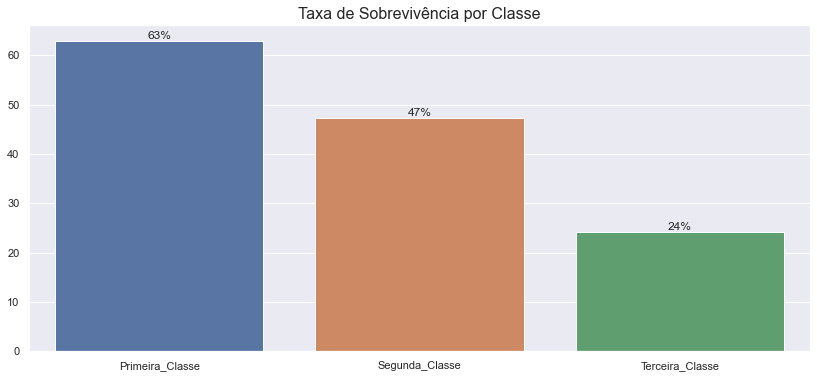

In [38]:
# Gerando um gráfico
ax = sns.barplot(data=df_taxa_sobrevivencias)
plt.title('Taxa de Sobrevivência por Classe', fontsize=16)
for i in ax.containers:
    ax.bar_label(i , fmt='%.0f%%') # Formato de porcentagem no gráfico atributo fmt
plt.show()

Com isso provamos com dados e visualizações que a probabilidade de não sobreviver ao Titanic é maior para homens e integrantes da terceira classe.

In [39]:
# Manipulando as tabelas para obtermos os dados dos HOMENS apenas
data_homens = df_treino.groupby(['Gênero', 'Sobreviveu', 'Classe_Passageiro'])['Gênero'].count() # Agrupando e contando
data_homens_dict = data_homens.to_dict() # Converte para texto plano dicionário
df_data_homens = pd.DataFrame(data=data_homens_dict, index=[0,1,2,3,4,5,6,7,8,9,10,11]) # Converte para df com índice
df_data_homens.drop([1,2,3,4,5,6,7,8,9,10,11], inplace=True) # Remove linhas duplicadas da conversão

df_data_homens.rename(columns={'0':'Não Sobreviveu', '1': 'Sobreviveu'}, inplace=True, level=1) # Renomeando colunas
df_data_homens.rename(columns={'1':'1ª Classe', '2': '2ª Classe', '3': '3ª Classe'}, inplace=True, level=2)

df_data_homens = df_data_homens.loc[0, 'male'] # Filtrando homens

falecidos_h = df_data_homens['Não Sobreviveu'].T # Criando objetos para análise
sobreviventes_h = df_data_homens['Sobreviveu'].T

Agora o mesmo para as MULHERES apenas

In [40]:
# Manipulando as tabelas para obtermos os dados dos APENAS apenas
data_mulheres = df_treino.groupby(['Gênero', 'Sobreviveu', 'Classe_Passageiro'])['Gênero'].count() # Agrupando e contando
data_mulheres_dict = data_mulheres.to_dict() # Converte para texto plano dicionário
df_data_mulheres = pd.DataFrame(data=data_mulheres_dict, index=[0,1,2,3,4,5,6,7,8,9,10,11]) # Converte para df com índice
df_data_mulheres.drop([1,2,3,4,5,6,7,8,9,10,11], inplace=True) # Remove linhas duplicadas da conversão

df_data_mulheres.rename(columns={'0':'Não Sobreviveu', '1': 'Sobreviveu'}, inplace=True, level=1) # Renomeando colunas
df_data_mulheres.rename(columns={'1':'1ª Classe', '2': '2ª Classe', '3': '3ª Classe'}, inplace=True, level=2)

df_data_mulheres = df_data_mulheres.loc[0, 'female'] # Filtrando homens

falecidos_m = df_data_mulheres['Não Sobreviveu'].T # Criando objetos para análise
sobreviventes_m = df_data_mulheres['Sobreviveu'].T

Agora vamos plotar visualizações para analisar os contrastes.

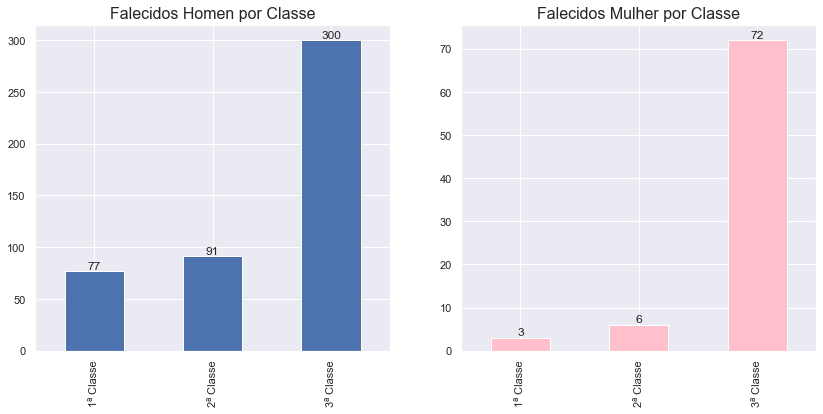

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2) # Área de plotagem dupla

ax_h = falecidos_h.plot(legend=False, kind='bar', 
                        ax=axes[0]); axes[0].set_title('Falecidos Homen por Classe', fontsize=16) # Plot homens

ax_m = falecidos_m.plot(legend=False, kind='bar', 
                        ax=axes[1], color='pink'); axes[1].set_title('Falecidos Mulher por Classe', fontsize=16) # Mulheres

for i in ax_h.containers:
    ax_h.bar_label(i) # Etiqueta de contagem na barra

for i in ax_m.containers:
    ax_m.bar_label(i) 

plt.show()

Praticamente toda morte feminina aconteceu na terceira classe. 

O mesmo se repete com os homens mas é incrível o dado de que apenas 3 mulheres morreram na primeira classe.

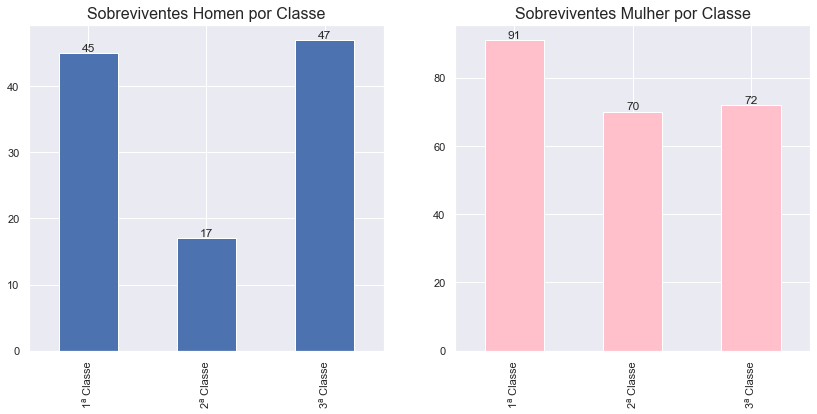

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2) # Área de plotagem dupla

ax_h = sobreviventes_h.plot(legend=False, kind='bar', 
                        ax=axes[0]); axes[0].set_title('Sobreviventes Homen por Classe', fontsize=16) # Plot homens

ax_m = sobreviventes_m.plot(legend=False, kind='bar', 
                        ax=axes[1], color='pink'); axes[1].set_title('Sobreviventes Mulher por Classe', fontsize=16) # Mulheres

for i in ax_h.containers:
    ax_h.bar_label(i) # Etiqueta de contagem na barra

for i in ax_m.containers:
    ax_m.bar_label(i) 

plt.show()

Os homens da terceira classe se sobressaem em toda visualização por conta da sua maioria expressiva abordo. Mas em proporções de embarque a primeira classe teve muito mais chances.

Com esse último contraste concluo a etapa de visualização e insights. Eu poderia plotar mais gráficos usando a idade dos tripulantes mas a maioria dos nossos valores são baseados na média porque não haviam dados suficientes para uma boa análise.

**7.ENGENHARIA DE RECURSOS (FEATURE ENGINEERING)**

Combinando todos os dados para facilitar as manipulações.

In [43]:
df_total = [df_treino, df_teste]

In [44]:
# Para os datasets no objeto, eliminar colunas na lista dada.
for dataset in df_total:
    drop_column = ['Nome', 'Idade',
                   'N_Esposa_Irmãos', 'N_Pais_Filhos', 
                   'Num_Passagem', 'Valor_Passagem',
                   'Num_Cabine', 'Local_Embarque']
    dataset.drop(drop_column, axis=1, inplace=True)

In [45]:
# Verifica para cada coluna no objeto quais as colunas restaram.
for columns in df_total:
    print(columns.columns)
    print('\n')

Index(['Sobreviveu', 'Classe_Passageiro', 'Gênero'], dtype='object')


Index(['Classe_Passageiro', 'Gênero'], dtype='object')




Convertendo atributos qualitativos categóricos em valores numéricos para reconhecimento do modelo. 

Vamos usar uma função do pacote Pandas para isso.

In [46]:
# Verificando como estava - Repare na coluna gênero
df_treino.head(2)

,Sobreviveu,Classe_Passageiro,Gênero
ID_Passageiro,,,
1,0,3,male
2,1,1,female


In [47]:
df_treino = pd.get_dummies(df_treino, columns = ['Gênero'])
df_teste = pd.get_dummies(df_teste, columns = ['Gênero'])

In [48]:
# Resultado
df_treino.head(2)

,Sobreviveu,Classe_Passageiro,Gênero_female,Gênero_male
ID_Passageiro,,,,
1,0,3,0,1
2,1,1,1,0


Agora nossos dados estão em um formato compreensível pelo modelo de aprendizado de máquina. Vamos trabalhar.

**8.ENGENHARIA DE MACHINE LEARNING (ML ENGINEERING)**

Pretendo usar as duas variáveis de maior correlação com o alvo (sobrevivência) como descrito anteriormente.

Antes de escolhermos um modelo precisamos listar algumas características sobre nosso problema e sobre nossos dados disponíveis.

* Temos um problema de classificação e regressão numérica;
* Nosso modelo precisa ser de aprendizagem supervisionada, já que vamos entregar inputs para ele o tempo todo;

Algumas das opções que temos de métodos de modelo são:

Logistic Regression

KNN

Support Vector Machines

Naive Bayes classifier

Decision Tree

Random Forrest

Linear Discriminant Analysis

Ada Boost Classifier

Gradient Boosting Classifier

Pretendo produzir um algorítmo para cada um desses métodos e usar os dados de teste para validar qual deles é mais preciso por meio de:

* Stratified KFold Cross Validation
"What is Stratified KFold Cross Validation? Stratified kfold cross validation is an extension of regular kfold cross validation but specifically for classification problems where rather than the splits being completely random, the ratio between the target classes is the same in each fold as it is in the full dataset."


* Confusion Matrix ou Matriz de Erro/Confusão
"No campo do Aprendizado de Máquina uma matriz de confusão é uma tabela que permite a visualização do desempenho de um algoritmo de classificação."



In [49]:
# Importando as bibliocas
from sklearn.model_selection import train_test_split # para dividir os dados em treino e validação
from sklearn.metrics import accuracy_score  # para medir a acurácia 
from sklearn.model_selection import KFold # medir K-fold cross validation
from sklearn.model_selection import cross_val_score # para validação do score
from sklearn.model_selection import cross_val_predict # predição de dados sem target
from sklearn.metrics import confusion_matrix # confusion matrix

# Separando o atributo target
all_features = df_treino.drop('Sobreviveu',axis=1)
feature_target = df_treino['Sobreviveu']

# Separando o dataset em 30%
X_train,X_test,y_train,y_test = train_test_split(all_features,feature_target,test_size=0.3,random_state=1)

# Verificando o shape das divisões
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 3), (268, 3), (623,), (268,))

Já temos nossos objetos de treino e validação preparados. Vamos começar a criar as versões de modelo com cada método.

**LogisticRegression - Modelo_v1**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v1 em LogisticRegression é de:  75.37
O score de cross validation foi:  78.67
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

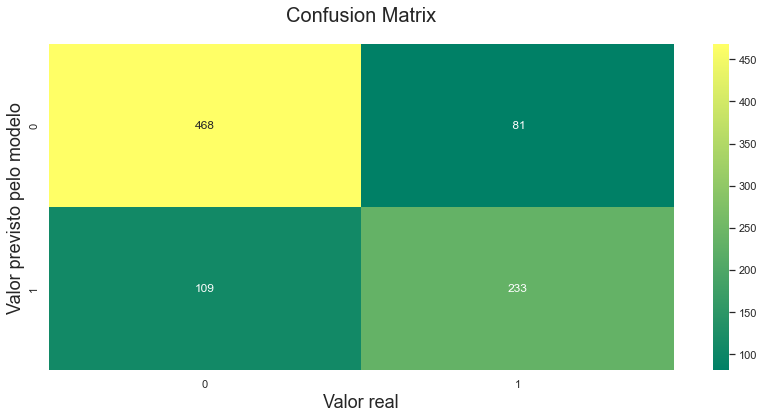

In [50]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

modelo_v1 = LogisticRegression() # Entrega o objeto ao método
modelo_v1.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v1 = modelo_v1.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v1 em LogisticRegression é de: ',
      round(accuracy_score(predicao_v1,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v1 = cross_val_score(modelo_v1,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v1.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v1,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

Lendo uma matriz de confusão:

Quanto mais perto do amarelo no mapa de calor significa que a predição da categorial foi igual a real. Axis 0 e 0.

Já na cor verde escuro 0 e 1 temos um falso positivo ou falso negativo - ou seja, um valor incorreto.

No caso do meme abaixo os axis estão invertidos mas o resultado da interpretação é o mesmo.

![image.png](https://miro.medium.com/max/462/1*7EYylA6XlXSGBCF77j_rOA.png)

Performance considerável para uma primeira tentativa. Dentro do range de 75-80%.

**RandomForestClassifier - Modelo_v2**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v2 em RandomForestClassifier é de:  74.63
O score de cross validation foi:  77.33
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

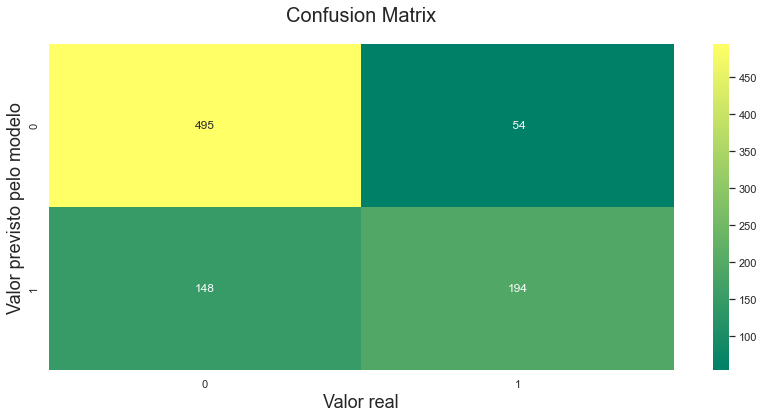

In [51]:
from sklearn.ensemble import RandomForestClassifier

modelo_v2 = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1) # Entrega o objeto ao método usando parâmetros de granularidade fina

modelo_v2.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v2 = modelo_v2.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v2 em RandomForestClassifier é de: ',
      round(accuracy_score(predicao_v2,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v2 = cross_val_score(modelo_v2,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v2.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v2,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

Performance inferior ao modelo_v1.

**Support Vector Machines, SVC - Modelo_v3**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v3 em Support Vector Machines é de:  74.63
O score de cross validation foi:  77.56
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

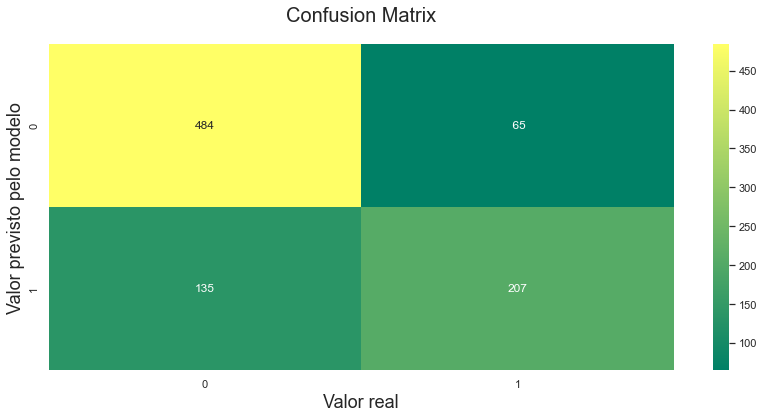

In [52]:
from sklearn.svm import SVC, LinearSVC

modelo_v3 = SVC() # Entrega o objeto ao método

modelo_v3.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v3 = modelo_v3.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v3 em Support Vector Machines é de: ',
      round(accuracy_score(predicao_v3,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v3 = cross_val_score(modelo_v3,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v3.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v3,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

Resultados muito próximos ao do modelo_v2 em RandomForest. A versão 1 continua ganhando.

**KNN Classifier - Modelo_v4**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v4 em KNN Classifier é de:  74.63
O score de cross validation foi:  79.23
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

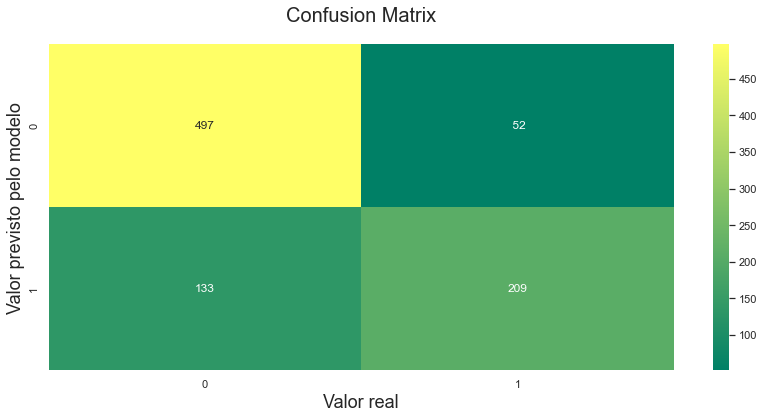

In [53]:
from sklearn.neighbors import KNeighborsClassifier

modelo_v4 = KNeighborsClassifier(n_neighbors = 4) # Entrega o objeto ao método usando o parâmetro 4 arbitrariamente

modelo_v4.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v4 = modelo_v4.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v4 em KNN Classifier é de: ',
      round(accuracy_score(predicao_v4,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v4 = cross_val_score(modelo_v4,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v4.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v4,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

Esse modelo se saiu melhor em cross validation mas pior em precisão geral. Isso demonstra a diferença de como a precisão é calculada e porque usamos os dois métodos. 

**Gaussian Naive Bayes - Modelo_v5**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v5 em Gaussian Naive Bayes é de:  75.37
O score de cross validation foi:  78.67
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

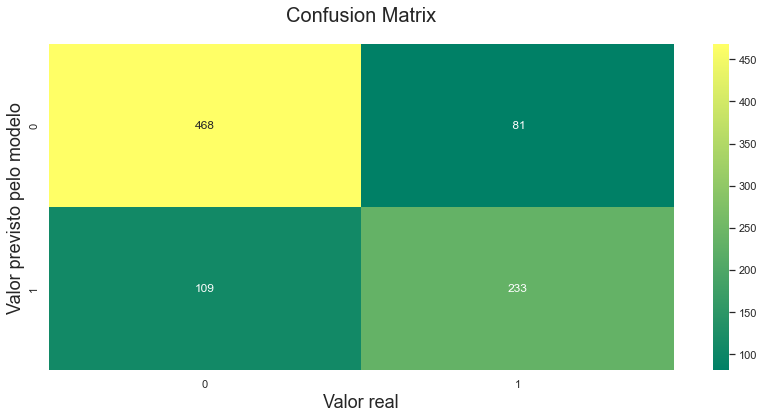

In [54]:
from sklearn.naive_bayes import GaussianNB

modelo_v5 = GaussianNB() # Entrega o objeto ao método 

modelo_v5.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v5 = modelo_v5.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v5 em Gaussian Naive Bayes é de: ',
      round(accuracy_score(predicao_v5,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v5 = cross_val_score(modelo_v5,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v5.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v5,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

Resultados próximos indiferente do método.

**Decision Tree - Modelo_v6**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v6 em Decision Tree é de:  74.63
O score de cross validation foi:  77.33
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

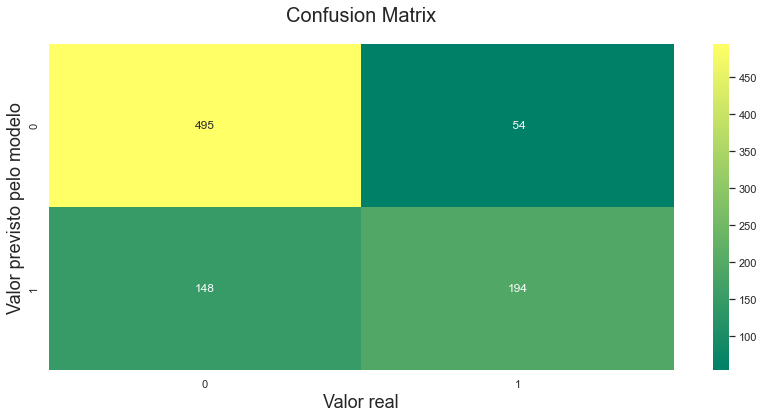

In [55]:
from sklearn.tree import DecisionTreeClassifier

modelo_v6 = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto') # Entrega o objeto ao método com granularidade fina nas decisões

modelo_v6.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v6 = modelo_v6.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v6 em Decision Tree é de: ',
      round(accuracy_score(predicao_v6,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v6 = cross_val_score(modelo_v6,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v6.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v6,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

**AdaBoost - Modelo_v7**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v7 em AdaBoost é de:  75.37
O score de cross validation foi:  78.67
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

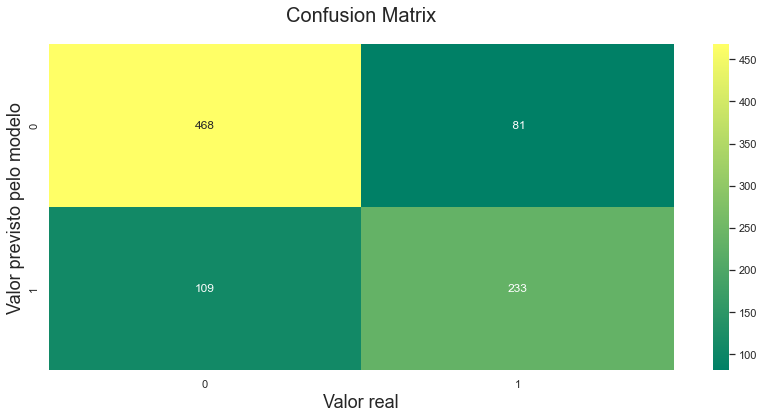

In [56]:
from sklearn.ensemble import AdaBoostClassifier

modelo_v7 = AdaBoostClassifier() # Entrega o objeto ao método

modelo_v7.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v7 = modelo_v7.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v7 em AdaBoost é de: ',
      round(accuracy_score(predicao_v7,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v7 = cross_val_score(modelo_v7,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v7.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v7,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

**Linear Discriminant Analysis - Modelo_v8**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v8 em Linear Discriminant Analysis é de:  75.37
O score de cross validation foi:  78.67
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

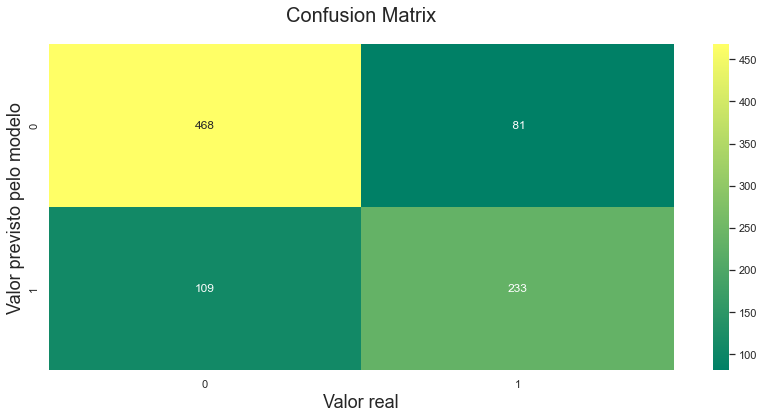

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

modelo_v8 = LinearDiscriminantAnalysis() # Entrega o objeto ao método

modelo_v8.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v8 = modelo_v8.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v8 em Linear Discriminant Analysis é de: ',
      round(accuracy_score(predicao_v8,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v8 = cross_val_score(modelo_v8,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v8.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v8,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

**Gradient Boosting Classifier - Modelo_v9**

--------------Medição da Precisão do Modelo---------------------------
A precisão do modelo_v9 em Gradient Boosting Classifier é de:  74.63
O score de cross validation foi:  77.33
----------------------------------------------------------------------


Text(102.5, 0.5, 'Valor previsto pelo modelo')

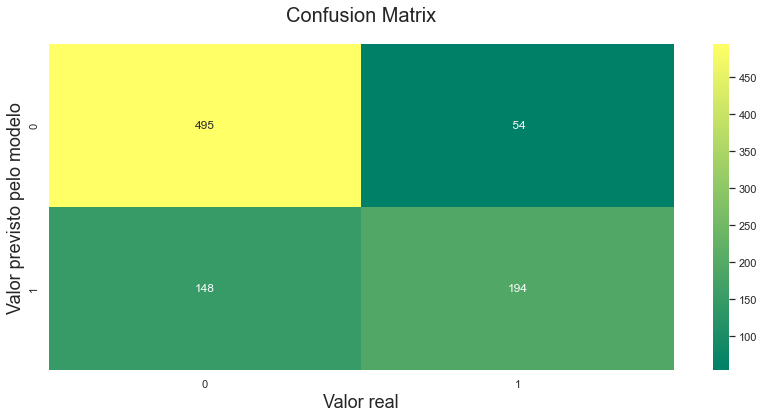

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_v9 = GradientBoostingClassifier() # Entrega o objeto ao método

modelo_v9.fit(X_train,y_train) # Treina o modelo com os dados supervisionados
predicao_v9 = modelo_v9.predict(X_test) # Gera a predição usando esse modelo vs os dados separadaos para teste

print('--------------Medição da Precisão do Modelo---------------------------')
print('A precisão do modelo_v9 em Gradient Boosting Classifier é de: ',
      round(accuracy_score(predicao_v9,y_test)*100,2)) # Arredonda o valor em porcentagem

kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_v9 = cross_val_score(modelo_v9,all_features,feature_target,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_v9.mean()*100,2)) # Arredonda média do resultado da cross validation
y_pred = cross_val_predict(modelo_v9,all_features,feature_target,cv=10)

print('-'*70)

sns.heatmap(confusion_matrix(feature_target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=20) # Cria a matriz de confusão para verificação visual
plt.xlabel('Valor real', fontsize=18)
plt.ylabel('Valor previsto pelo modelo', fontsize=18)

**9. CLASSIFICAÇÃO DOS MODELOS**

Vamos verificar qual entre os nove modelos se saiu melhor.

In [59]:
modelos = pd.DataFrame({
    'Modelo': ['v1_Logistic Regression','v2_Random Forest','v3_Support Vector Machines',
               'v4_KNN', 'v5_Naive Bayes','v6_Decision Tree',
               'v7_AdaBoostClassifier', 'v8_Linear Discriminant Analysis','v9_Gradient Boosting'],

    'Pontuação': [resultado_v1.mean(), resultado_v2.mean(),resultado_v3.mean(), 
                  resultado_v4.mean(), resultado_v5.mean(),resultado_v6.mean(),
                  resultado_v7.mean(), resultado_v8.mean(),resultado_v9.mean()]})

modelos.sort_values(by='Pontuação',ascending=False)

,Modelo,Pontuação
3,v4_KNN,0.792347
0,v1_Logistic Regression,0.786729
4,v5_Naive Bayes,0.786729
6,v7_AdaBoostClassifier,0.786729
7,v8_Linear Discriminant Analysis,0.786729
2,v3_Support Vector Machines,0.775568
1,v2_Random Forest,0.773321
5,v6_Decision Tree,0.773321
8,v9_Gradient Boosting,0.773321


Com base nas médias dos resultados o modelo mais preciso foi usando o método KNN, modelo versão 4.

Até o momento considero essa etapa do estudo encerrada. 

Em breve conforme meus conhecimentos sobre hyper parâmetros, XGBoost, Catboost etc. forem aprimorados pretendo atualizar esse notebook com versões melhoradas desses modelos e re-classificar qual deles seria o melhor.

Agora vou gerar minha inscrição para a competição do Kaggle usando o modelo_v4 nos dados totais e submeter para a comunidade.

Além disso, vou exportar esse modelo para criação do website de interação com o usuário final - onde ele eu irei fazer o deploy desse estudo para o mundo real.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

df_treino_original = pd.read_csv('data/train.csv')
df_teste_original = pd.read_csv('data/test.csv')

# Separando o atributo target
features = ['Pclass', 'Sex']

# Recriando os objetos de aprendizado
y = df_treino_original['Survived']
X = pd.get_dummies(df_treino_original[features])
X_teste = pd.get_dummies(df_teste_original[features])


modelo_final = KNeighborsClassifier(n_neighbors = 4) # Entrega o objeto ao método usando o parâmetro 4 arbitrariamente

modelo_final.fit(X, y) # Treina o modelo com os dados supervisionados
predicao_final = modelo_final.predict(X_teste) # Gera a predição usando esse modelo vs os dados separadaos para teste

#saida = pd.DataFrame({'PassengerId': df_teste_original.PassengerId, 'Survived': predicao_final})
#saida.to_csv('submission.csv', index=False)

![image.png](https://i.postimg.cc/FHV3dPvp/miniatura-linkedin-github.png)

In [61]:
# Criando o arquivo para o modelo - Esse arquivo será usado no Flask (HTML) do nosso deploy.
#import pickle

#with open('modelo_final_arquivo.pkl', 'wb') as file:
#    pickle.dump(modelo_final, file)

Usando a função get_dummies do Pandas nosso deploy não ficou da maneira como eu imaginei, já que as variáveis categórias tiveram que ser divididas em duas colunas diferentes para a compreensão do modelo. 

A fim de resolver esse problema, vou eu mesmo transformar as observações categórias em numéricas por meio da função replace. Male será 0 e Female será 1 (ao invés de dividir as colunas). 

Feito isso verificarei se a acurácia do modelo continua a mesma ou se devo usar outro método.

In [62]:
print('Essa é a disposição antiga dos dados usando a função get_dummies:')
X_teste

Essa é a disposição antiga dos dados usando a função get_dummies:


,Pclass,Sex_female,Sex_male
0,3,0,1
1,3,1,0
2,2,0,1
3,3,0,1
4,3,1,0
...,...,...,...
413,3,0,1
414,1,1,0
415,3,0,1
416,3,0,1


In [63]:
print('Essa é a disposição original dos dados:')
df_teste_original

Essa é a disposição original dos dados:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [64]:
# A coluna target já está no tipo correto, logo não vou trabalhar nela.
df_treino_original['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [65]:
# Iremos alterar manualmente esses dados:
df_treino_original[features]

,Pclass,Sex
0,3,male
1,1,female
2,3,female
3,1,female
4,3,male
...,...,...
886,2,male
887,1,female
888,3,female
889,1,male


In [66]:
# Usando a função replace para transformar manualmente os dados:
df_treino_original['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

# Verifica resultados:
df_treino_original['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [67]:
# Replicando para os dados de teste:
df_teste_original['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

# Verifica resultados:
df_teste_original['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

Note que já estão no dtype int64 e não string.

In [68]:
# Verificando o dtype da categoria PClass:
df_treino_original['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

Também já está em int64. Agora vamos modelar usando esses novos dados.

In [69]:
# Recriando os objetos de aprendizado
y = df_treino_original['Survived']
X = df_treino_original[features]
X_teste = df_teste_original[features]


modelo_final_v2 = KNeighborsClassifier(n_neighbors = 4) # Entrega o objeto ao método usando o parâmetro 4 arbitrariamente

modelo_final_v2.fit(X, y) # Treina o modelo com os dados supervisionados
predicao_final_v2 = modelo_final_v2.predict(X_teste) # Gera a predição usando esse modelo vs os dados separadaos para teste

Verificando se o modelo continua na mesma faixa de desempenho após as alterações nos dados originais sem usar get_dummies.

In [70]:
saida_v2 = pd.DataFrame({'PassengerId': df_teste_original.PassengerId, 'Survived': predicao_final_v2})
saida_v2.set_index('PassengerId', inplace=True)
saida_v2

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [71]:
print('--------------Medição da Precisão do Modelo---------------------------')
kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_final_v2 = cross_val_score(modelo_final_v2,X,y,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_final_v2.mean()*100,2)) # Arredonda média do resultado da cross validation

print('-'*70)

--------------Medição da Precisão do Modelo---------------------------
O score de cross validation foi:  79.23
----------------------------------------------------------------------


O valor se manteve o mesmo. Vamos exportar o modelo com o novo tratamento nos dados.

In [72]:
# Criando o arquivo para o modelo - Esse arquivo será usado no Flask (HTML) do nosso deploy.
#import pickle

#with open('modelo_final_v2.pkl', 'wb') as file:
#    pickle.dump(modelo_final_v2, file)

In [73]:
# Usando o notebook para simular os inputs do Flask
teste_dados_input = pd.DataFrame([[3, 0]], columns=['Pclass', 'Sex']).astype('int64')
modelo_final_v2.predict(teste_dados_input)[0]

0

Apesar de no notebook funcionar bem, aparentemente quando o valor da variável Sex é 0 o flask não traz de volta o resultado da predição. Vou trocar novamente os dados originais para 10 homem e 20 mulher.

In [74]:
# Usando a função replace para transformar manualmente os dados:
df_treino_original['Sex'].replace({0: 10}, inplace=True)

# Dois passos separados para evitar sobreposição do código (nome antigo - nome novo):
df_treino_original['Sex'].replace({1: 20}, inplace=True)

# Verifica resultados:
df_treino_original['Sex']

0      10
1      20
2      20
3      20
4      10
       ..
886    10
887    20
888    20
889    10
890    10
Name: Sex, Length: 891, dtype: int64

In [75]:
# Replicando para os dados de teste:
df_teste_original['Sex'].replace({0: 10}, inplace=True)

# Dois passos separados para evitar sobreposição do código (nome antigo - nome novo):
df_teste_original['Sex'].replace({1: 20}, inplace=True)

# Verifica resultados:
df_teste_original['Sex']

0      10
1      20
2      10
3      10
4      20
       ..
413    10
414    20
415    10
416    10
417    10
Name: Sex, Length: 418, dtype: int64

In [76]:
# Recriando os objetos de aprendizado
y = df_treino_original['Survived']
X = df_treino_original[features]
X_teste = df_teste_original[features]


modelo_final_v3 = KNeighborsClassifier(n_neighbors = 4) # Entrega o objeto ao método usando o parâmetro 4 arbitrariamente

modelo_final_v3.fit(X, y) # Treina o modelo com os dados supervisionados
predicao_final_v3 = modelo_final_v3.predict(X_teste) # Gera a predição usando esse modelo vs os dados separadaos para teste

In [77]:
saida_v3 = pd.DataFrame({'PassengerId': df_teste_original.PassengerId, 'Survived': predicao_final_v3})
saida_v3.set_index('PassengerId', inplace=True)
saida_v3

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [78]:
print('--------------Medição da Precisão do Modelo---------------------------')
kfold = KFold(n_splits=10) # Dividindo os dados em 10 partes para teste em KFold
resultado_final_v3 = cross_val_score(modelo_final_v3,X,y,cv=10,scoring='accuracy') # Cross Validation Score

print('O score de cross validation foi: ',round(resultado_final_v3.mean()*100,2)) # Arredonda média do resultado da cross validation

print('-'*70)

--------------Medição da Precisão do Modelo---------------------------
O score de cross validation foi:  77.89
----------------------------------------------------------------------


Houve uma pequena perda após alterar o modo como as categorias eram representadas. Talvez seja necessário trocar o método do algorítmo no futuro.

In [79]:
# Criando o arquivo para o modelo - Esse arquivo será usado no Flask (HTML) do nosso deploy.
#import pickle

#with open('modelo_final_v3.pkl', 'wb') as file:
#    pickle.dump(modelo_final_v3, file)

In [80]:
# Usando o notebook para simular os inputs do Flask
teste_dados_input = pd.DataFrame([[3, 10]], columns=['Pclass', 'Sex']).astype('int64')
modelo_final_v3.predict(teste_dados_input)[0]

0

No notebook está funcionando bem. Vamos testar em produção.

Em produção funcionou bem, porém, com apenas duas features nosso modelo está muito simples. Vou produzir uma nova versão contend mais variáveis para entreter o usuário e dar mais diversidade de resultados.

In [81]:
# Listando features atuais:
df_treino_original[features]

,Pclass,Sex
0,3,10
1,1,20
2,3,20
3,1,20
4,3,10
...,...,...
886,2,10
887,1,20
888,3,20
889,1,10


Vamos gerar visualizações com outras features com correlação relevante.

[[Text(0, 0, 'Southampton'),
  Text(0, 1, 'Cherbourg'),
  Text(0, 2, 'Queenstown')]]

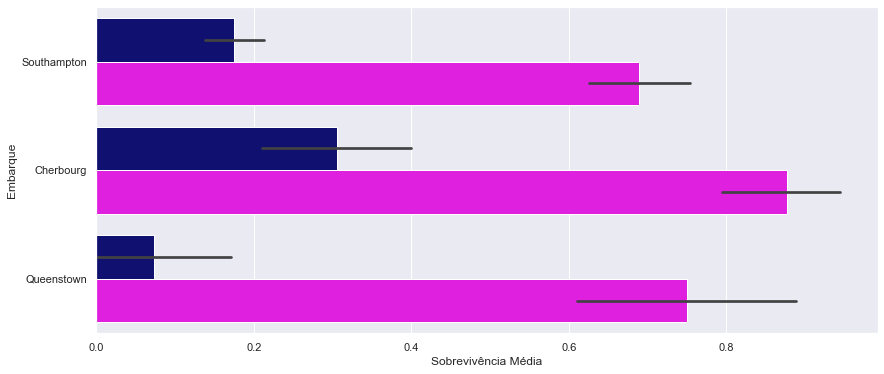

In [148]:
# Sobrevivência por local de embarque, por gênero:

cores = ['navy', 'magenta']
ax = sns.barplot(data=df_treino_original, x='Survived', y='Embarked', hue='Sex', palette=cores)
plt.legend([],[], frameon=False)
ax.set(xlabel='Sobrevivência Média', ylabel='Embarque')
ax.set(yticklabels=['Southampton', 'Cherbourg', 'Queenstown'])

Note visualmente como no geral Cherbourg tem o maior índice de sobrevivência.

In [153]:
# Verificando a maior taxa de sobrevivência
temp = df_treino_original[['Embarked', 'Survived']]
temp_teste = temp.groupby(['Embarked']).value_counts(normalize=True)*100
temp_teste

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
dtype: float64

Cherbourg teve a maior taxa de sobrevivência (55.36%). Essa informação irá impactar no cálculo do algorítmo de predição.

Agora vamos transformar essas categorias string em numéricas. CONTINUAR DAQUI <<<<<

In [ ]:
# Adicionando novas features no objeto:
features = ['Pclass', 'Sex', 'Embarked']

In [159]:
# Recriando os objetos de aprendizado
#y = df_treino_original['Survived']
#X = df_treino_original[features]
#X_teste = df_teste_original[features]


#modelo_final_v4 = KNeighborsClassifier(n_neighbors = 4) # Entrega o objeto ao método usando o parâmetro 4 arbitrariamente

#modelo_final_v4.fit(X, y) # Treina o modelo com os dados supervisionados
#predicao_final_v4 = modelo_final_v4.predict(X_teste) # Gera a predição usando esse modelo vs os dados separadaos para teste

In [ ]:
# Criando o arquivo para o modelo - Esse arquivo será usado no Flask (HTML) do nosso deploy.
#import pickle

#with open('modelo_final_v4.pkl', 'wb') as file:
#    pickle.dump(modelo_final_v4, file)